# Vistral-V: A Vietnamese Large Vision-Language Model

This project demonstrates visual instruction tuning applied to the Vistral large language model (LLM). This enables the model to understand and respond to prompts that combine both visual and textual information in Vietnamese.

**Key features:**

* **Multimodal understanding:** Process images and Vietnamese text together.
* **Instruction following:** Respond to complex instructions that involve visual input.
* **Vietnamese language specialization:** Fine-tuned for accuracy and fluency in Vietnamese.

**Resources:**

* **GitHub repository:** [Vistral-V](https://github.com/hllj/Vistral-V/tree/main?tab=readme-ov-file) (Codebase and details)
* **HuggingFace model:** [Vistral-V 7B](https://huggingface.co/Vi-VLM/Vistral-V-7B) (Try it out!)


> **Access Requirement**: The following demonstration employs the [Vistral Vision model](https://huggingface.co/Vi-VLM/Vistral-V-7B), which requires authorized access. Please ensure you have the necessary permissions on Hugging Face to interact with the model before proceeding.

## Login HuggingFace

In [1]:
# # Add Read HuggingFace Token to download weight models
# from kaggle_secrets import UserSecretsClient
# from huggingface_hub.hf_api import HfFolder

# # Get HF Token, please add HF read token to Kaggle secret, or token = "hf..."
# token = UserSecretsClient().get_secret("HF_TOKEN") 

# HfFolder.save_token(token)

## Getting Started

This Kaggle example demonstrates how to use [Vistral Vision](https://huggingface.co/Vi-VLM/Vistral-V-7B), an AI model that can understand and discuss images in Vietnamese. 

*Note*: To run this code, you'll need access to the model on Hugging Face. If you don't have access yet, please request it before proceeding.


**What you'll see:**
* **Sets up the Vistral Vision model:** We'll load the model and get it ready to process images and text.
* **Interactive conversations:**  Ask questions about images, and Vistral Vision will respond in Vietnamese.

**Try it yourself!** Follow the steps below to run the code and start a conversation with Vistral Vision.

### Setting configs

In [1]:
# Option 1: Lora Adapter and Base model
# model_path = "Vi-VLM/llava-vistral-7b-lora"
# model_base = "Viet-Mistral/Vistral-7B-Chat"

# Option 2: Full Model

# model_path = "Vi-VLM/Vistral-V-7B"
model_path = "/home/lhbac/vic/Vistral-V/scripts/vistral_llava/.checkpoints/llava_vistral-ft"
model_base = None
# model_base = "Viet-Mistral/Vistral-7B-Chat"


conv_mode = "vistral"


temperature = 0.2
max_new_tokens = 512
load_8bit = False
load_4bit = False

debug = False
device = "cuda:0" # device = "cuda" if you want to inference with multiple GPU devices
# device = "cpu" # device = "cuda" if you want to inference with multiple GPU devices


In [3]:
# /home/lhbac/.cache/huggingface/hub/models--Vi-VLM--Vistral-V-7B

### Import Libraries and Load the Model

To ensure optimal model performance and compatibility in diverse environments, we enable `disable_torch_init`. This helps prevent conflicts and improves resource management when deploying the model.

In [2]:
from llava.utils import disable_torch_init

disable_torch_init()

In [3]:
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path

# Get the model name
model_name = get_model_name_from_path(model_path)

# FIXME: Vistral-V is need to be fixed, add prefix 'llava-'
if 'vistral-v' in model_name.lower():
    model_name = 'llava-' + model_name

/home/lhbac/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model_name

'llava_vistral-ft'

In [5]:
%%time
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=model_path,
    model_base=model_base,
    model_name=model_name,
    load_8bit=load_8bit,
    load_4bit=load_4bit,
    device=device
)

[DEBUG] model_path, model_base, model_name: ('/home/lhbac/vic/Vistral-V/scripts/vistral_llava/.checkpoints/llava_vistral-ft', None, 'llava_vistral-ft')
Loading LLaVA model...
######################################
True
######################################


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading checkpoint shards: 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]
Some weights of the model checkpoint at /home/lhbac/vic/Vistral-V/scripts/vistral_llava/.checkpoints/llava_vistral-ft were not used when initializing LlavaVistralForCausalLM: ['model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.bias', 'model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.weight', 'model.vision_tower.vision_tower.vision_model.embeddings.position_embedding.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.weight', 'model.vision_

CLIPVisionTower()
LlavaVistralForCausalLM(
  (model): LlavaVistralModel(
    (embed_tokens): Embedding(38369, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNo

In [6]:
model

LlavaVistralForCausalLM(
  (model): LlavaVistralModel(
    (embed_tokens): Embedding(38369, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e

### Load image using

In [7]:
import requests
from PIL import Image
from io import BytesIO

def load_image(image_file):
    if image_file.startswith('http://') or image_file.startswith('https://'):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(image_file).convert('RGB')
    return image

### Configuring the Conversation Template

In [8]:
from llava.conversation import conv_templates

if "llama-2" in model_name.lower():
    conv_mode = "llava_llama_2"
elif "mistral" in model_name.lower():
    conv_mode = "mistral_instruct"
elif "vistral" in model_name.lower():
    conv_mode = "vistral"
elif "v1.6-34b" in model_name.lower():
    conv_mode = "chatml_direct"
elif "v1" in model_name.lower():
    conv_mode = "llava_v1"
elif "mpt" in model_name.lower():
    conv_mode = "mpt"
else:
    conv_mode = "llava_v0"

conv_system = conv_templates[conv_mode].copy()
if "mpt" in model_name.lower():
    roles = ('user', 'assistant')
else:
    roles = conv_system.roles

In [9]:
model_name

'llava_vistral-ft'

In [10]:
conv_system

Conversation(system='Cuộc trò chuyện giữa một người dùng tò mò và chuyên gia trong lĩnh vực nhân tướng học, chuyên nhìn mặt để đánh giá các đặc điểm trên khuôn mặt.Chuyên gia đưa ra câu trả lời hữu ích, chi tiết, và tập trung chỉ trả lời theo ý của người dùng. Chuyên gia chỉ trả ngắn gọn đặc điểm mà người dùng yêu cầu', roles=('USER', 'ASSISTANT'), messages=[], offset=0, sep_style=<SeparatorStyle.LLAMA_2: 5>, sep='', sep2='</s>', version='llama_v2', skip_next=False)

## Let's chat !!

### Set Up Your Workspace
Start by importing the required libraries and loading the image you want to analyze.


In [11]:
import torch

from llava.conversation import SeparatorStyle
from llava.mm_utils import process_images, tokenizer_image_token
from llava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN, DEFAULT_IM_START_TOKEN, DEFAULT_IM_END_TOKEN

from transformers import TextStreamer
from IPython.display import display

# # Get the image size and díplay it
# image_size = image.size

# # Similar operation in model_worker.py
# image_tensor = process_images([image], image_processor, model.config)


In [12]:
def image_to_tensor(image):
    image_tensor = process_images([image], image_processor, model.config)

    if type(image_tensor) is list:
        image_tensor = [image.to(model.device, dtype=torch.float16) for image in image_tensor]
    else:
        image_tensor = image_tensor.to(model.device, dtype=torch.float16)
        
    return image_tensor

### Chat !

In [13]:
def chat(image, image_tensor, image_size, conv):
    print("""\n\n\n""")
    while True:
        try:
            inp = input(f"{roles[0]}: ")
        except EOFError:
            inp = ""
        if not inp:
            print("exit...")
            return conv.get_messages()


        print(f"{roles[1]}: ", end="")

        if image is not None:
            # first message
            if model.config.mm_use_im_start_end:
                inp = DEFAULT_IM_START_TOKEN + DEFAULT_IMAGE_TOKEN + DEFAULT_IM_END_TOKEN + '\n' + inp
            else:
                inp = DEFAULT_IMAGE_TOKEN + '\n' + inp
            image = None

        conv.append_message(conv.roles[0], inp)
        conv.append_message(conv.roles[1], None)
        prompt = conv.get_prompt()

        input_ids = tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(0).to(model.device)
        stop_str = conv.sep if conv.sep_style != SeparatorStyle.TWO else conv.sep2
        keywords = [stop_str]
        streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

        with torch.inference_mode():
            output_ids = model.generate(
                input_ids,
                images=image_tensor,
                image_sizes=[image_size],
                do_sample=True if temperature > 0 else False,
                temperature=temperature,
                max_new_tokens=max_new_tokens,
                streamer=streamer,
                use_cache=True)

        outputs = tokenizer.decode(output_ids[0]).strip()
        conv.messages[-1][-1] = outputs

        if debug:
            print("\n", {"prompt": prompt[-1], "outputs": outputs}, "\n")


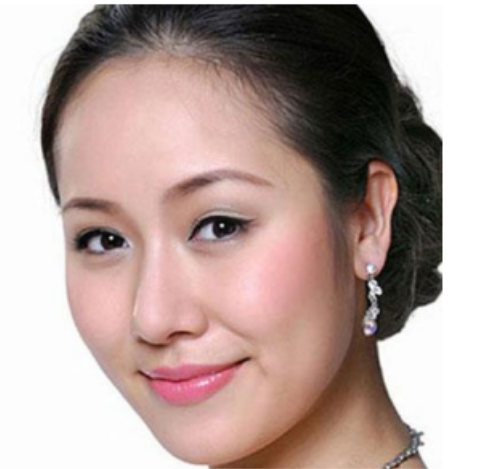

In [14]:
# image = load_image(image_file)

# print("This is the image using")
# display(image)

image_file = "/home/lhbac/vic/Vistral-V/assets/images/1.png"
image = load_image("/home/lhbac/vic/Vistral-V/assets/images/aa.png")
display(image)


image_tensor = image_to_tensor(image)
image_size = image.size

In [15]:
conv_1 = conv_system.copy()

In [16]:
chat_history = chat(image, image_tensor, image_size, conv_1)






ASSISTANT: 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Mắt to, hơi lồi.​ 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Miệng rộng, môi trên mỏng. 
exit...


In [20]:
!pip install transformers==4.37.2

  Using cached transformers-4.37.2-py3-none-any.whl.metadata (129 kB)
  Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.37.2-py3-none-any.whl (8.4 MB)
Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


In [13]:
chat_history = chat(image, image_tensor, image_size, conv_1)





ASSISTANT: 

/home/lhbac/anaconda3/envs/llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Người phụ nữ trong ảnh có tam đình cân đối. Thượng đình của cô ấy rộng và đầy đặn, trung đình của cô ấy thẳng và cân đối, và hạ đình của cô ấy đầy đặn và tròn trịa. Tam đình cân đối cho thấy cô ấy có sức khỏe tốt và có thể sống lâu. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Tam đình của người phụ nữ trong ảnh là cân đối và hài hòa. Thượng đình của cô ấy rộng và đầy đặn, trung đình của cô ấy thẳng và cân đối, và hạ đình của cô ấy đầy đặn và tròn trịa. Tam đình cân đối cho thấy cô ấy có sức khỏe tốt và có thể sống lâu. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Người phụ nữ trong ảnh có khuôn mặt hình bầu dục. Khuôn mặt bầu dục là hình dạng khuôn mặt cân đối và hài hòa, với chiều rộng trán và cằm gần bằng nhau. Người phụ nữ trong ảnh có trán rộng và cằm tròn, tạo nên hình dạng khuôn mặt bầu dục. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Không, mặt người này không dài. Mặt cô ấy có hình bầu dục, có nghĩa là chiều rộng trán và cằm gần bằng nhau. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Mắt của người phụ nữ trong ảnh to và tròn, với lông mi dài và cong. Mắt cô ấy có màu nâu sẫm và có vẻ rất biểu cảm. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Lông mày của người phụ nữ trong ảnh rậm và cong, tạo nên vẻ ngoài quyến rũ và hấp dẫn. Lông mày của cô ấy có màu nâu sẫm và hòa hợp với màu tóc của cô ấy. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Sơn căn của người phụ nữ trong ảnh rộng và đầy đặn, tạo nên vẻ ngoài tự tin và quyết đoán. Sơn căn của cô ấy có màu nâu sẫm và hòa hợp với màu tóc của cô ấy. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Sơn căn của người phụ nữ trong ảnh rộng và đầy đặn, tạo nên vẻ ngoài tự tin và quyết đoán. Sơn căn của cô ấy có màu nâu sẫm và hòa hợp với màu tóc của cô ấy. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Gò má của người phụ nữ trong ảnh cao và đầy đặn, tạo nên vẻ ngoài khỏe mạnh và tràn đầy sức sống. Gò má của cô ấy có màu nâu sẫm và hòa hợp với màu tóc của cô ấy. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Miệng của người phụ nữ trong ảnh rộng và đầy đặn, tạo nên vẻ ngoài thân thiện và cởi mở. Miệng cô ấy có màu hồng nhạt và có vẻ rất biểu cảm. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Miệng của người phụ nữ trong ảnh rộng và đầy đặn, tạo nên vẻ ngoài thân thiện và cởi mở. Môi cô ấy có màu hồng nhạt và có vẻ rất biểu cảm. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Tai của người phụ nữ trong ảnh lớn và tròn, tạo nên vẻ ngoài hấp dẫn và quyến rũ. Tai cô ấy có màu nâu sẫm và có vẻ rất biểu cảm. Tai cô ấy nằm ở hai bên đầu, với phần trên của tai nằm gần với đỉnh đầu. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Tai của người phụ nữ trong ảnh lớn và tròn, tạo nên vẻ ngoài hấp dẫn và quyến rũ. Tai cô ấy có màu nâu sẫm và có vẻ rất biểu cảm. Tai cô ấy nằm ở hai bên đầu, với phần trên của tai nằm gần với đỉnh đầu. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Trán của người phụ nữ trong ảnh rộng và đầy đặn, tạo nên vẻ ngoài tự tin và quyết đoán. Trán cô ấy có màu nâu sẫm và hòa hợp với màu tóc của cô ấy. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Cằm của người phụ nữ trong ảnh đầy đặn và tròn, tạo nên vẻ ngoài thân thiện và cởi mở. Cằm cô ấy có màu nâu sẫm và hòa hợp với màu tóc của cô ấy. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Trán của người phụ nữ trong ảnh rộng và đầy đặn, tạo nên vẻ ngoài tự tin và quyết đoán. Trán cô ấy có màu nâu sẫm và hòa hợp với màu tóc của cô ấy. 
exit...


In [18]:
chat_history

[['USER',
  '<image>\nmô tả tam đình của người này. Với Tam đình bao gồm "thượng đình" là từ trán đến lông mày, "trung đình" là từ lông mày đến sống mũi, "hạ đình" là từ dưới mũi đến cằm.'],
 ['ASSISTANT',
  'Người phụ nữ trong ảnh có tam đình cân đối. Thượng đình của cô ấy rộng và đầy đặn, trung đình của cô ấy thẳng và cân đối, và hạ đình của cô ấy đầy đặn và tròn trịa. Tam đình cân đối cho thấy cô ấy có sức khỏe tốt và có thể sống lâu. </s>'],
 ['USER', 'mô tả tam đình'],
 ['ASSISTANT',
  'Tam đình của người phụ nữ trong ảnh là cân đối và hài hòa. Thượng đình của cô ấy rộng và đầy đặn, trung đình của cô ấy thẳng và cân đối, và hạ đình của cô ấy đầy đặn và tròn trịa. Tam đình cân đối cho thấy cô ấy có sức khỏe tốt và có thể sống lâu. </s>'],
 ['USER', 'mô tả hình dạng khuôn mặt'],
 ['ASSISTANT',
  'Người phụ nữ trong ảnh có khuôn mặt hình bầu dục. Khuôn mặt bầu dục là hình dạng khuôn mặt cân đối và hài hòa, với chiều rộng trán và cằm gần bằng nhau. Người phụ nữ trong ảnh có trán rộng 

In [19]:
import pandas as pd

In [25]:
df = pd.DataFrame(chat_history)
df.to_csv("woman.csv", index=False, header=False )


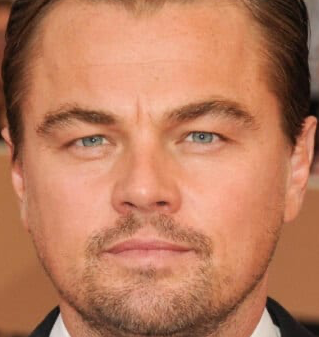

In [15]:
image_file_2 = "/home/lhbac/vic/Vistral-V/assets/images/1.png"
image_2 = load_image(image_file_2)
display(image_2)


image_tensor_2 = image_to_tensor(image_2)
image_size_2 = image_2.size

In [16]:
conv_2 = conv_system.copy()


In [17]:
chat_history_2 = chat(image_2, image_tensor_2, image_size_2, conv_2)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Trong ảnh, người đàn ông có "thượng đình" (trán) rộng và đầy đặn, "trung đình" (lông mày) rậm và "hạ đình" (mũi và cằm) thon gọn. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Người đàn ông trong ảnh có khuôn mặt hình bầu dục, với các đặc điểm cân đối và hài hòa. Khuôn mặt của anh ấy có hình dạng tròn trịa, với các đường nét mềm mại và không có góc cạnh. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Mặt của người đàn ông trong ảnh có hình bầu dục, có nghĩa là nó có chiều dài lớn hơn chiều rộng. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Người đàn ông trong ảnh có đôi mắt xanh sáng, biểu cảm và có hồn. Đôi mắt của anh ấy có hình dạng hơi dài và hẹp, với lông mày rậm và lông mi dài. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Người đàn ông trong ảnh có đôi lông mày rậm và rậm rạp. Chúng có hình dạng hơi cong và hướng lên trên, tạo cho anh ấy một vẻ ngoài tự tin và quyết đoán. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Người đàn ông trong ảnh có gò má cao và nổi bật. Chúng có hình dạng tròn trịa và đầy đặn, tạo cho anh ấy một vẻ ngoài mạnh mẽ và nam tính. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Người đàn ông trong ảnh có đôi môi mỏng và hơi cong. Chúng có màu hồng nhạt và có vẻ như được chăm sóc tốt. Miệng của anh ấy có hình dạng hơi rộng và hơi cong, tạo cho anh ấy một nụ cười ấm áp và thân thiện. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Người đàn ông trong ảnh có trán rộng và đầy đặn. Nó có hình dạng hơi tròn và có một đường viền rõ ràng. Trán của anh ấy có màu sáng và không có nếp nhăn hoặc khuyết điểm đáng chú ý. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Tai của người đàn ông trong ảnh nằm cao hơn lông mày một chút. Chúng có hình dạng hơi tròn và có một đường viền rõ ràng. Tai của anh ấy có màu sáng và không có nếp nhăn hoặc khuyết điểm đáng chú ý. 


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


ASSISTANT: Dựa trên các đặc điểm trên khuôn mặt của người đàn ông trong ảnh, tôi sẽ nói rằng anh ấy có một vẻ ngoài hấp dẫn và dễ chịu. Các đặc điểm trên khuôn mặt của anh ấy cân đối, hài hòa và có sức hấp dẫn. Tuy nhiên, vẻ đẹp là một khái niệm chủ quan và sở thích cá nhân có thể khác nhau. 
exit...


In [26]:
df = pd.DataFrame(chat_history_2)
df.to_csv("man.csv", index=False, header=False)

In [27]:
man_df = pd.read_csv("man.csv")

In [28]:
man_df

,USER,"<image>\nmô tả tam đình. Với Tam đình bao gồm ""thượng đình"" là từ trán đến lông mày, ""trung đình"" là từ lông mày đến sống mũi, ""hạ đình"" là từ dưới mũi đến cằm"
0,ASSISTANT,"Trong ảnh, người đàn ông có ""thượng đình"" (trá..."
1,USER,Mô tả khuôn mặt
2,ASSISTANT,Người đàn ông trong ảnh có khuôn mặt hình bầu ...
3,USER,"mặt của người này ngang hay dài, hay như thế nào?"
4,ASSISTANT,Mặt của người đàn ông trong ảnh có hình bầu dụ...
5,USER,mắt của người này?
6,ASSISTANT,"Người đàn ông trong ảnh có đôi mắt xanh sáng, ..."
7,USER,chân mày thì như thế nào?
8,ASSISTANT,Người đàn ông trong ảnh có đôi lông mày rậm và...
9,USER,gò má của ông này có đặc điểm gì?


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# enable fast weights download and upload
%env HF_HUB_ENABLE_HF_TRANSFER=1 

In [1]:
!wget -L https://raw.githubusercontent.com/brevdev/notebooks/main/assets/llava-deploy.sh 

--2024-08-09 07:11:49--  https://raw.githubusercontent.com/brevdev/notebooks/main/assets/llava-deploy.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 868 [text/plain]
Saving to: ‘llava-deploy.sh’

llava-deploy.sh     100%[===================>]     868  --.-KB/s    in 0s      

2024-08-09 07:11:49 (122 MB/s) - ‘llava-deploy.sh’ saved [868/868]



In [3]:
!chmod +x llava-deploy.sh && ./llava-deploy.sh

2024-08-09 07:14:24 | INFO | controller | args: Namespace(host='0.0.0.0', port=10000, dispatch_method='shortest_queue')
2024-08-09 07:14:24 | INFO | controller | Init controller
2024-08-09 07:14:24 | ERROR | stderr | INFO:     Started server process [3958194]
2024-08-09 07:14:24 | ERROR | stderr | INFO:     Waiting for application startup.
2024-08-09 07:14:24 | ERROR | stderr | INFO:     Application startup complete.
2024-08-09 07:14:24 | ERROR | stderr | INFO:     Uvicorn running on http://0.0.0.0:10000 (Press CTRL+C to quit)
2024-08-09 07:14:36 | INFO | gradio_web_server | args: Namespace(host='0.0.0.0', port=None, controller_url='http://0.0.0.0:10000', concurrency_count=16, model_list_mode='reload', share=True, moderate=False, embed=False)
2024-08-09 07:14:36 | INFO | stdout | INFO:     127.0.0.1:57864 - "POST /refresh_all_workers HTTP/1.1" 200 OK
2024-08-09 07:14:36 | INFO | stdout | INFO:     127.0.0.1:57872 - "POST /list_models HTTP/1.1" 200 OK
2024-08-09 07:14:36 | INFO | gradio